## Hash Sets and Hash Maps

- Hash sets and [hash maps](https://en.wikipedia.org/wiki/Hash_table) are data structures commonly used in programming. They are a bit similar to (named-) lists, but they can perform certain operations much faster. 
- Implementation of hash sets/maps is unfortunatelly not directly available in the base R, but they can be used via the package [r2r](https://cran.r-project.org/web/packages/r2r/index.html) (under the hood, the package rellies on the usage of R [environments](https://adv-r.hadley.nz/environments.html)).

In [1]:
#install.packages('r2r')
#install.packages('microbenchmark')
options(repr.plot.width = 16, repr.plot.height = 10)
library(r2r)
library(microbenchmark)

### Hashing allows access in constant time
- Starting with R lists and vectors: the good thing is that they allow constant time $\mathcal{O}(1)$ access to their elements, if we use the integer index.

In [2]:
small_list = as.list(1:10) # The elements of the list can be anything, we just use here numbers for simplicity
very_large_list = as.list(1:10^6)

bench_read_1 <- microbenchmark(x <- small_list[[7]])
bench_read_2 <- microbenchmark(x <- very_large_list[[456789]])

print(bench_read_1)
print(bench_read_2)

Unit: nanoseconds
                 expr min lq   mean median  uq  max neval
 x <- small_list[[7]]  98 99 154.92    100 100 4951   100
Unit: nanoseconds
                           expr min  lq   mean median  uq  max neval
 x <- very_large_list[[456789]]  98 100 133.99    101 101 3213   100


- So far so good: accessing elements in the lists took about same time for both small and large list. Also, the operation is super fast in general, as it took only about 150 nanoseconds.
- However, things get worse if we want to check for presence of certain object (number, string...) in the list. The R simply try to compare the object to every element in the list. If the list get larger, then there will be (on average) more comparisons needed to be made. This is a linear time $\mathcal{O}(n)$ operation.

[1] 10
[1] 100
[1] 1000
[1] 10000
[1] 1e+05
[1] 1e+06


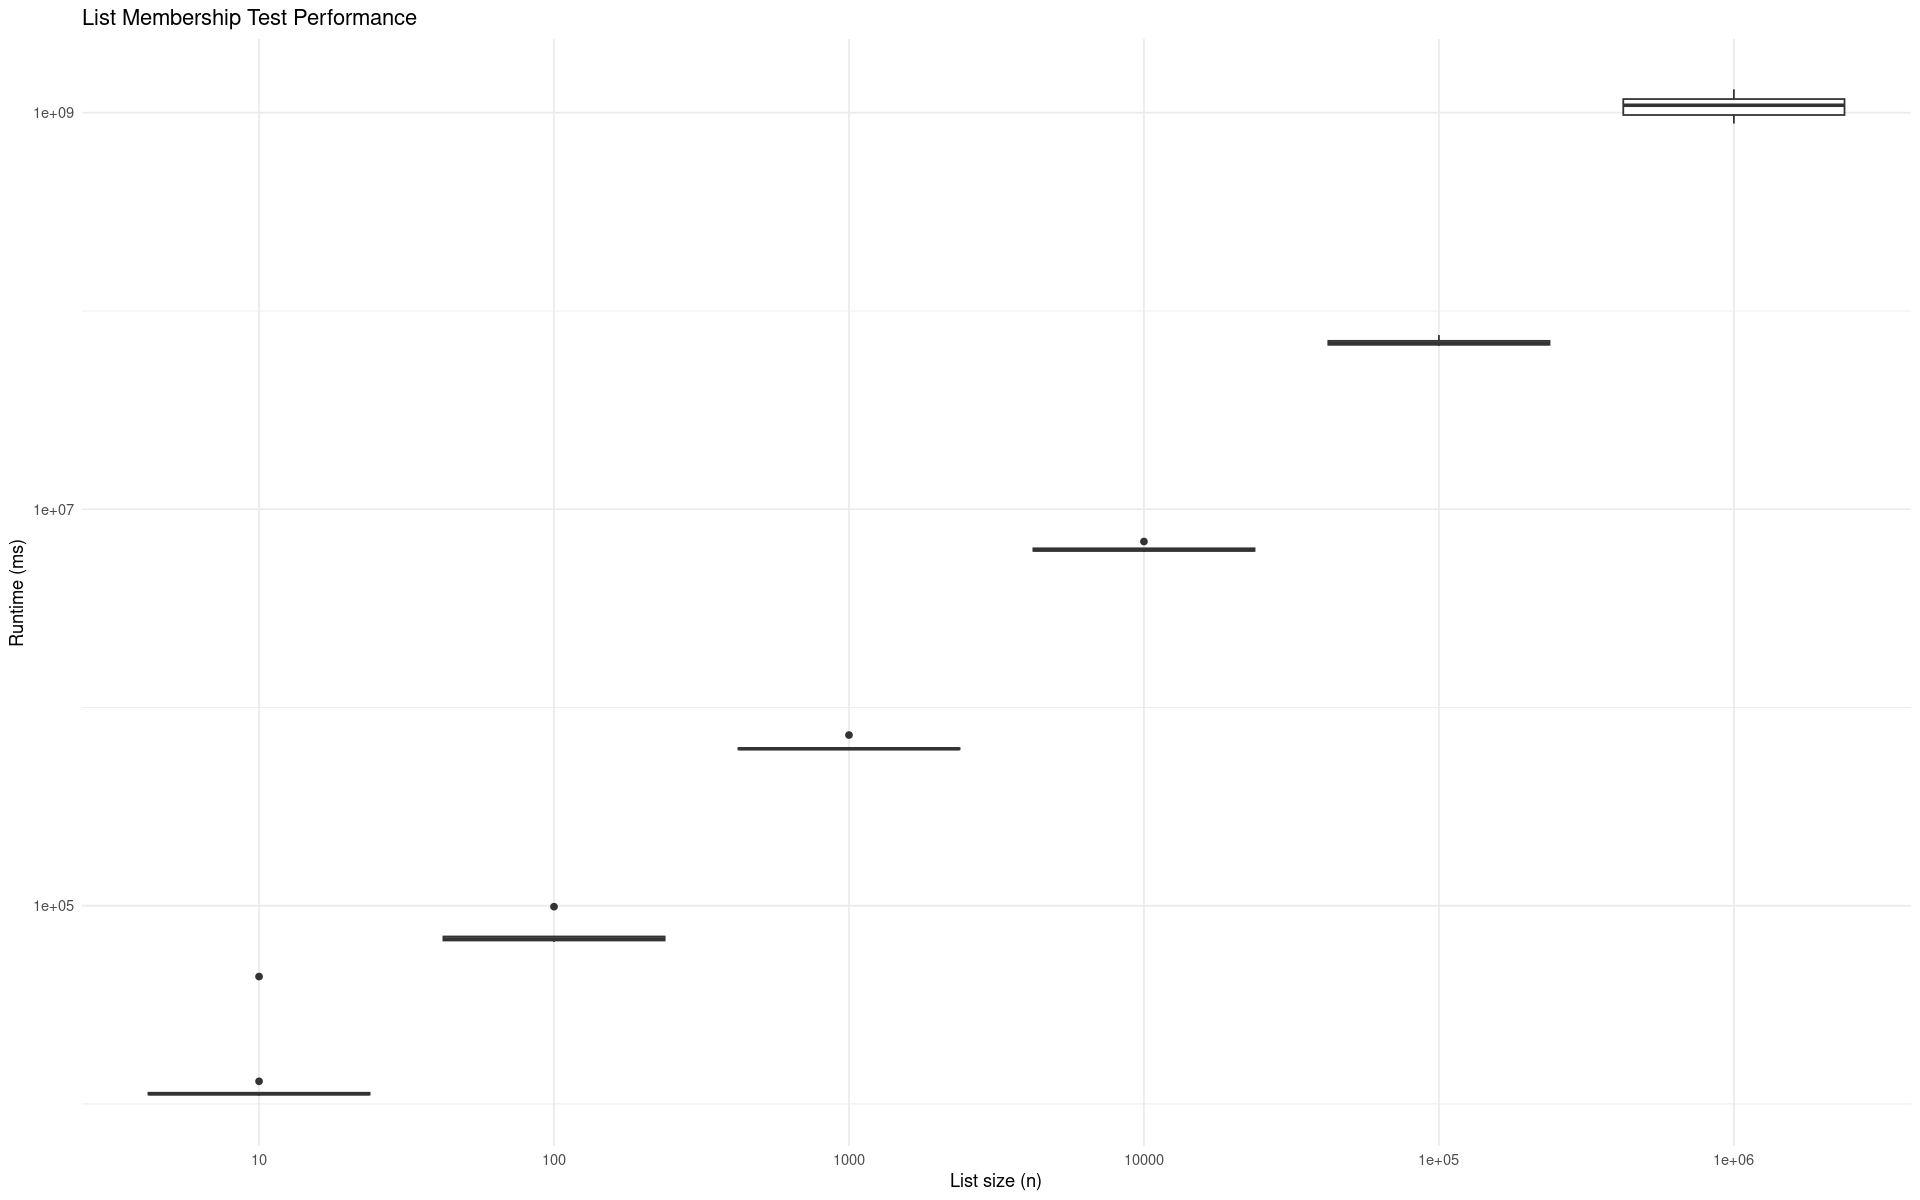

In [3]:
library(microbenchmark)
library(ggplot2)

list_sizes <- 10^(1:6)
results <- data.frame(n = character(), time = numeric())

for (n in list_sizes) {    
    tested_list <- as.list(sample(1:n, n, replace = TRUE))    
    bench_read <- microbenchmark(is_included <- sample(1:n, 1) %in% tested_list, unit = "ms", times=10)     
    results <- rbind(results, data.frame(n = as.character(n), time = bench_read$time))
}

ggplot(results, aes(x = n, y = time)) +
    geom_boxplot() +
    scale_y_log10() +
    labs(x = "List size (n)", y = "Runtime (ms)", title = "List Membership Test Performance") +
    theme_minimal()


Doing the same using hashsets:

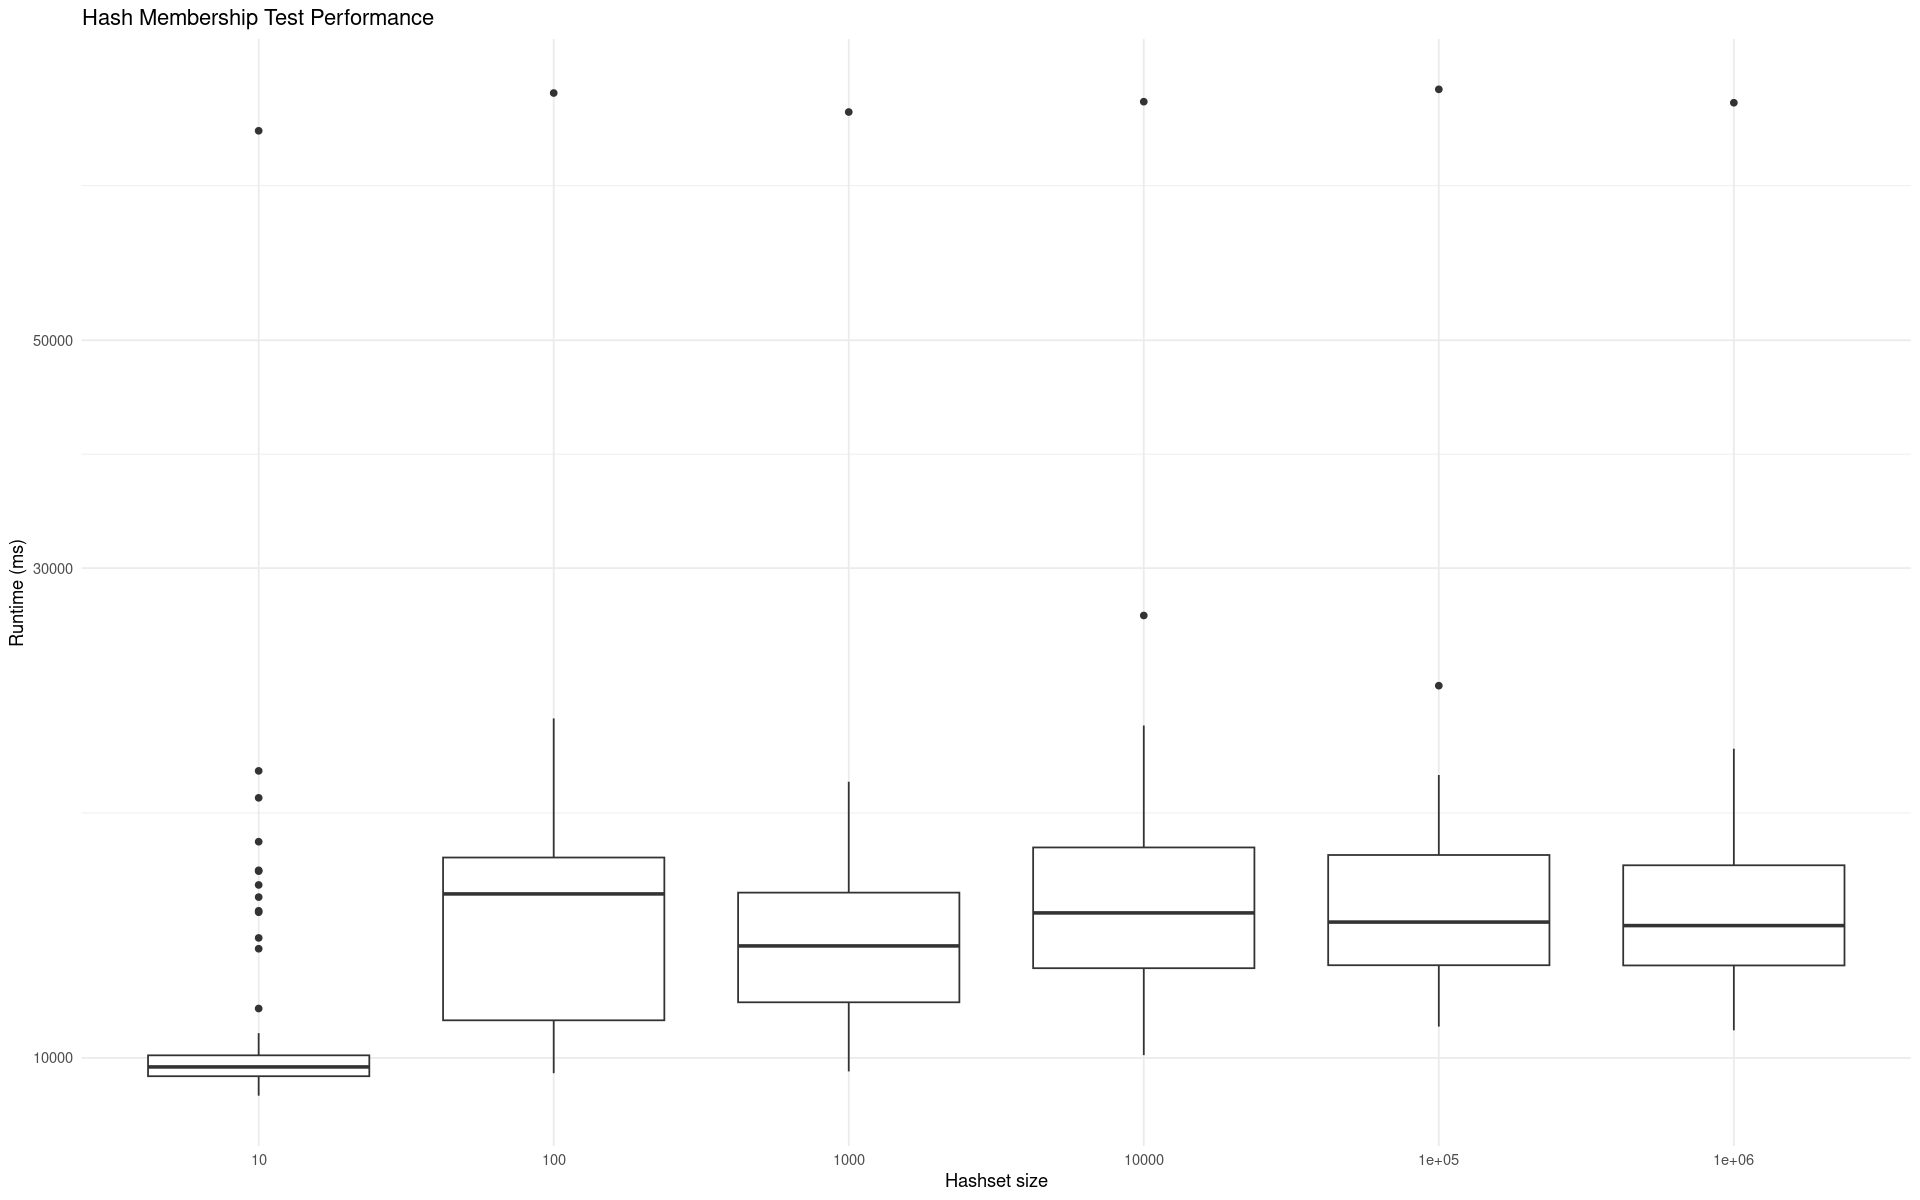

In [5]:
library(microbenchmark)
library(ggplot2)

list_sizes <- 10^(1:6)
results <- data.frame(n = character(), time = numeric())

for (n in list_sizes) {
    tested_hashset <- do.call(hashset, as.list(sample(1:n, n))) 
    bench_read <- microbenchmark(is_included <- tested_hashset[[sample(1:n, 1)]], unit = "ms", times=100)     
    results <- rbind(results, data.frame(n = as.character(n), time = bench_read$time))
}

ggplot(results, aes(x = n, y = time)) +
    geom_boxplot() +
    scale_y_log10() +
    labs(x = "Hashset size", y = "Runtime (ms)", title = "Hash Membership Test Performance") +
    theme_minimal()